# Analysis of Behavioral Results

This notebook is copied from the repository provided by the original authors, with some edits made. 

In [28]:
import sys, os, glob, scipy, sqlite3, json, matplotlib#, pymer4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import matplotlib.ticker as mtick
import json
import glob
# import FigureTools

In [3]:
# Style
import matplotlib.style as style
#style.use('seaborn-poster') #sets the size of the charts
#style.use('seaborn-white')
sns.set_palette('tab10')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['font.family'] = "Helvetica"

# Load data

In [4]:
# Filepaths
proj_dir = os.path.abspath('../../')
print(proj_dir)
data_dir = os.path.join(proj_dir,'data/pilotA')
print(data_dir)
json_dir = os.path.join(data_dir,'json')
print(json_dir)
csv_dir = os.path.join(data_dir,'csv')
print(csv_dir)


# sys.path.append('/'.join(os.path.realpath('..').split('/')[:4]) + '/Python')
# import FigureTools

/Users/Nora/Documents/Github/courses/psych251/psych251_project
/Users/Nora/Documents/Github/courses/psych251/psych251_project/data/pilotA
/Users/Nora/Documents/Github/courses/psych251/psych251_project/data/pilotA/json
/Users/Nora/Documents/Github/courses/psych251/psych251_project/data/pilotA/csv


In [5]:
# Get a list of all CSV files in the folder
all_files = glob.glob(os.path.join(data_dir, "*.csv"))
print(f'The csv files are {all_files}')

# Get the number of CSV files in the folder
num_participants = len(all_files)
print(f'There are {num_participants} participants')

# Read each CSV into a DataFrame and store them in a list
list_of_dfs = [pd.read_csv(f) for f in all_files]

# Concatenate all DataFrames in the list into a single DataFrame
df = pd.concat(list_of_dfs, ignore_index=True)

# Examine df
print(f'The columns are {df.columns}')
df.head(3)

# Check how many participants
print('%i participants found'%len(df['subjectID'].unique()))

The csv files are ['/Users/Nora/Documents/Github/courses/psych251/psych251_project/data/pilotA/7ltaxxqfoa_trials.csv', '/Users/Nora/Documents/Github/courses/psych251/psych251_project/data/pilotA/j1tuuj5uqn_trials.csv']
There are 2 participants
The columns are Index(['view_history', 'rt', 'trial_type', 'trial_index', 'plugin_version',
       'time_elapsed', 'subjectID', 'prolificID', 'studyID', 'sessionID',
       'success', 'task', 'response', 'question_order', 'Matrix', 'S', 'T',
       'R', 'P', 'GameType', 'choice', 'GivenAns', 'Player', 'PlayerType',
       'CorrAns', 'confidence', 'ScoreNum', 'stimulus'],
      dtype='object')
2 participants found


# Get Survey Data

In [6]:
# Filter for rows which hold the responses to the survey data
surveyDat = df[df['task'].isin(['demographics', 'technical'])]

In [7]:
# Remove unecessary columns
cols = ['subjectID', 'studyID', 'sessionID', 'task', 'response']
surveyDat = surveyDat[cols]

In [8]:
# Examine df
surveyDat.head(5)

,subjectID,studyID,sessionID,task,response
142,7ltaxxqfoa,NaN,NaN,demographics,"{""age"":""23"",""gender"":""Prefer Not to Say""}"
143,7ltaxxqfoa,NaN,NaN,technical,"{""technical"":""None"",""feedback"":""Clear instruct..."
286,j1tuuj5uqn,NaN,NaN,demographics,"{""age"":""57"",""gender"":""Female""}"
287,j1tuuj5uqn,NaN,NaN,technical,"{""technical"":""none"",""feedback"":""no""}"


# Get Task Data

In [9]:
# Filter for rows which hold the responses to the social prediction game
taskDat = df[df['task'] == 'socialPredictionGame']

In [10]:
# Remove unecessary columns
cols = ['rt', 'time_elapsed', 'subjectID', 'studyID', 'sessionID', 'task', 'Matrix', 'S', 'T', 'R', 'P', 'GameType', 'choice', 'GivenAns', 'Player', 'PlayerType', 'CorrAns', 'confidence', 'ScoreNum', 'stimulus']
taskDat = taskDat[cols]

In [11]:
# Examine df
taskDat.head(3)

,rt,time_elapsed,subjectID,studyID,sessionID,task,Matrix,S,T,R,P,GameType,choice,GivenAns,Player,PlayerType,CorrAns,confidence,ScoreNum,stimulus
11,NaN,107587,7ltaxxqfoa,NaN,NaN,socialPredictionGame,"{""R"":10,""P"":5,""S"":0,""T"":8}",0.0,8.0,10.0,5.0,SH,Yellow,coop,D.T.,opt_inv,def,10.0,0.0,NaN
13,NaN,125485,7ltaxxqfoa,NaN,NaN,socialPredictionGame,"{""R"":10,""P"":5,""S"":7,""T"":12}",7.0,12.0,10.0,5.0,SG,Yellow,coop,D.T.,opt_inv,coop,7.0,1.0,NaN
15,NaN,3961075,7ltaxxqfoa,NaN,NaN,socialPredictionGame,"{""R"":10,""P"":5,""S"":7,""T"":8}",7.0,8.0,10.0,5.0,HG,Yellow,coop,D.T.,opt_inv,def,6.0,0.0,NaN


In [12]:
# Rename columns to correspond with those used in paper
taskDat.rename(columns = {
    'subjectID': 'subID',
    'PlayerType': 'Type_Total',
    'confidence': 'Confidence',
    'ScoreNum': 'Score'
}, inplace=True)



# ['Type_Total', 'Type', 'Variant', 'Confidence', 'Score']

In [13]:
# Add 'Type' and 'Variant' columns from 'Type_Total'
taskDat[['Type', 'Variant']] = taskDat['Type_Total'].str.split('_', expand=True)

In [14]:
# firstType = gameDat.loc[(gameDat['Trial']==0) & (gameDat['Block']==0), ['subID','Type_Total']].reset_index(drop=True)
# firstType.columns = ['subID','FirstType']
# thirdType = gameDat.loc[(gameDat['Trial']==0) & (gameDat['Block']==2), ['subID','Type_Total']].reset_index(drop=True)
# thirdType.columns = ['subID','ThirdType']
# gameDat = gameDat.merge(firstType,on='subID').merge(thirdType,on='subID')
# gameDat.head()

In [15]:
# gtOrder = ['HG','SG','SH','PD']
# roundOrder = range(4)
# ptOrder = ['opt_nat','pess_nat','opt_inv','pess_inv']

##### Best score: subject 2133. What did they discover?

In [16]:
# gameDat.loc[gameDat['subID']==2133,['Type_Total','SelfReport']].drop_duplicates()

## Overall performance by player type

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


NameError: name 'FigureTools' is not defined

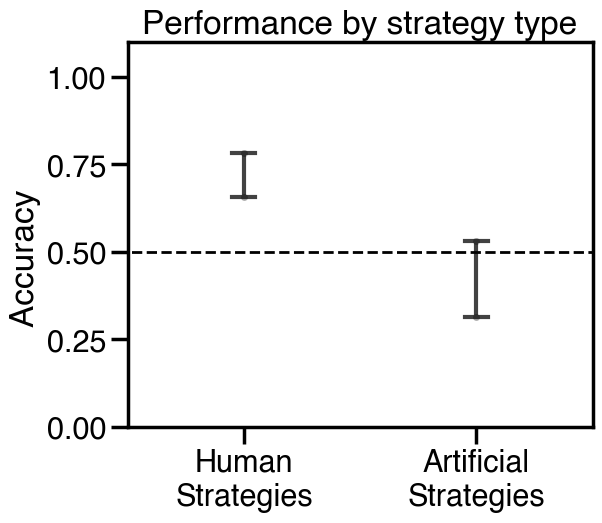

In [ ]:
sns.set_context('poster')
# change to analysis code -- blockDat changed bc code wasn't working
blockDat = (taskDat.groupby(['subID', 'Variant'], as_index=False)[['Confidence', 'Score']].mean())
fig, ax = plt.subplots(1,1,figsize=[6,5])
sns.barplot(data=blockDat,x='Variant',y='Score', ax=ax, errwidth = 3, capsize=.1,
            order=['nat','inv'],alpha=0)
sns.swarmplot(data=blockDat,x='Variant',y='Score', ax=ax,
            order=['nat','inv'], alpha=.3, color = 'k')
ax.plot([-5,5],[.5,.5], 'k--', lw=2)
ax.set(ylim = [0,1.1], xlim = [-.5,1.5], xlabel = None, yticks = [0,.25,.5,.75,1],
       title = 'Performance by strategy type',
       xticklabels = ['Human\nStrategies', 'Artificial\nStrategies'], ylabel = 'Accuracy     ');
dat1 = blockDat.loc[blockDat['Variant']=='nat','Score'].values
dat2 = blockDat.loc[blockDat['Variant']=='inv','Score'].values
stats = scipy.stats.ttest_rel(dat2,dat1)
# FigureTools.add_sig_markers(ax, relationships=[[0,1,stats[1]]])
sns.despine(top=True,right=True)
ax.spines['left'].set_bounds(0,1)
ax.set_ylim([0,1.4])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
# plt.savefig(baseDir+'/Figures/plot1b.pdf',transparent=True, bbox_inches='tight');

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


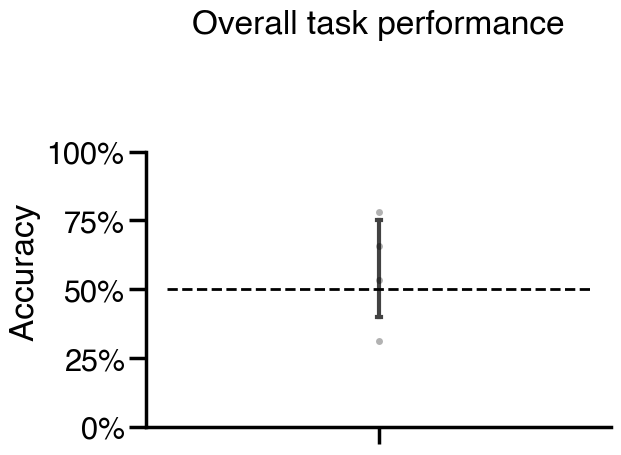

In [18]:
sns.set_context('poster')
# change to analysis code -- overallDat changed bc code wasn't working
overallDat = (taskDat.groupby(['subID'], as_index=False)[['Confidence', 'Score']].mean())
fig, ax = plt.subplots(1,1,figsize=[6,5])
sns.barplot(data=blockDat,y='Score', ax=ax, errwidth = 3, capsize=.1,
            alpha=0)
sns.swarmplot(data=blockDat,y='Score', ax=ax,
            alpha=.3, color = 'k')
ax.plot([-5,5],[.5,.5], 'k--', lw=2)
ax.set(ylim = [0,1.1], xlabel = None, yticks = [0,.25,.5,.75,1],
       title = 'Overall task performance',
       ylabel = 'Accuracy        ');
stats = scipy.stats.ttest_1samp(overallDat['Score'].values, 0.5)
# FigureTools.add_sig_markers(ax, relationships=[[0,0,stats[1]]])
sns.despine(top=True,right=True)
ax.spines['left'].set_bounds(0,1)
ax.set_ylim([0,1.4])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
# plt.savefig(baseDir+'/Figures/plot1d.pdf',transparent=True, bbox_inches='tight');

In [19]:
def ttest_1samp(dat, popmean = .5, verbose = True):
    if verbose:
        print('SD: ',np.std(dat))
        print('Stats:')
    stats = scipy.stats.ttest_1samp(dat, popmean = popmean)
    if verbose:
        print(stats)
        print('Cohen d:')
    coh_d = (np.mean(dat) - popmean)/np.std(dat)
    if verbose:
        print(coh_d)
    return(stats, coh_d)

In [20]:
def ttest_2samp(dat1, dat2):
    print('SD dat 1: ',np.std(dat1))
    print('SD dat 2: ',np.std(dat2))
    print('Stats:')
    stats = scipy.stats.ttest_ind(dat1, dat2)
    print(stats)
    print('Cohen d:')
    nx = len(dat1)
    ny = len(dat2)
    dof = nx + ny - 2
    coh_d = ((np.mean(dat1) - np.mean(dat2)) /
             np.sqrt(((nx-1)*np.std(dat1, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / dof))
    print(coh_d)
    return(stats, coh_d)

In [21]:
ttest_1samp(overallDat['Score'].values);

SD:  0.0234375
Stats:
TtestResult(statistic=3.0, pvalue=0.20483276469913345, df=1)
Cohen d:
3.0


In [22]:
scipy.stats.wilcoxon(overallDat['Score'].values-0.5)

WilcoxonResult(statistic=0.0, pvalue=0.5)

##### Plot model reproduction of this effect

In [23]:
sim_dat = pd.read_csv(baseDir + '/Data/Cleaned/Model_simulations_%s_%s.csv'%('CoGrRiNa','best'), index_col=0)
sim_dat.head()

NameError: name 'baseDir' is not defined

In [ ]:
sns.set_context('poster')
sim_block_dat = sim_dat[['subID','Type_Total','Variant','Confidence','model_score']
                  ].groupby(['subID','Variant']).mean().reset_index()
fig, ax = plt.subplots(1,1,figsize=[6,5])
sns.barplot(data=sim_block_dat,x='Variant',y='model_score', ax=ax, errwidth = 3, capsize=.1,
            order=['nat','inv'],alpha=0)
sns.swarmplot(data=sim_block_dat,x='Variant',y='model_score', ax=ax,
            order=['nat','inv'], alpha=.3, color = 'k')
ax.plot([-5,5],[.5,.5], 'k--', lw=2)
ax.set(ylim = [0,1.1], xlim = [-.5,1.5], xlabel = None, yticks = [0,.25,.5,.75,1],
       title = 'Model prediction',
       xticklabels = ['Human\nStrategies', 'Artificial\nStrategies'], ylabel = 'Accuracy     ');
dat1 = sim_block_dat.loc[sim_block_dat['Variant']=='nat','model_score'].values
dat2 = sim_block_dat.loc[sim_block_dat['Variant']=='inv','model_score'].values
stats = scipy.stats.ttest_rel(dat2,dat1)
FigureTools.add_sig_markers(ax, relationships=[[0,1,stats[1]]])
sns.despine(top=True,right=True)
ax.spines['left'].set_bounds(0,1)
ax.set_ylim([0,1.4])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
# plt.savefig(baseDir+'/Figures/plot1c.pdf',transparent=True, bbox_inches='tight');

NameError: name 'sns' is not defined

##### Mean performance, compare distribution of mean per subject against 50%

In [ ]:
taskDat['Score'].describe()

count    128.000000
mean       0.570312
std        0.496977
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Score, dtype: float64

In [ ]:
meanPerSub = taskDat.groupby('subID').mean()['Score'].values
print(len(meanPerSub))
scipy.stats.ttest_1samp(meanPerSub, .5)

TypeError: agg function failed [how->mean,dtype->object]

##### Compare human vs artificial strategy performance using within subjects t-test

In [ ]:
stats

In [ ]:
# modified bc of error (agg function failed [how->mean,dtype->object])
meanPerSubCondition = taskDat.groupby(['subID','Variant'], as_index=False)['Score'].mean().pivot(
    index='subID', columns='Variant', values='Score')
meanPerSubCondition.head()

Variant,inv,nat
subID,,
7ltaxxqfoa,0.53125,0.65625
j1tuuj5uqn,0.31250,0.78125


Within natural

In [ ]:
meanPerSubCondition['nat'].describe()

count    2.000000
mean     0.718750
std      0.088388
min      0.656250
25%      0.687500
50%      0.718750
75%      0.750000
max      0.781250
Name: nat, dtype: float64

In [ ]:
scipy.stats.ttest_1samp(meanPerSubCondition['nat'], .5)

TtestResult(statistic=3.5, pvalue=0.17717106556580947, df=1)

Within artificial

In [ ]:
meanPerSubCondition['inv'].describe()

count    2.000000
mean     0.421875
std      0.154680
min      0.312500
25%      0.367188
50%      0.421875
75%      0.476562
max      0.531250
Name: inv, dtype: float64

In [ ]:
scipy.stats.ttest_1samp(meanPerSubCondition['inv'], .5)

TtestResult(statistic=-0.7142857142857143, pvalue=0.605136913422507, df=1)

Between natural and artificial

In [ ]:
scipy.stats.ttest_rel(meanPerSubCondition['inv'],meanPerSubCondition['nat'])


TtestResult(statistic=-1.7272727272727273, pvalue=0.3340953646873604, df=1)

In [ ]:
ttest_1samp((meanPerSubCondition['nat']-meanPerSubCondition['inv']), popmean = 0)

SD:  0.171875
Stats:
TtestResult(statistic=1.7272727272727273, pvalue=0.3340953646873604, df=1)
Cohen d:
1.7272727272727273


(TtestResult(statistic=1.7272727272727273, pvalue=0.3340953646873604, df=1),
 1.7272727272727273)